X.shape: (26, 2)


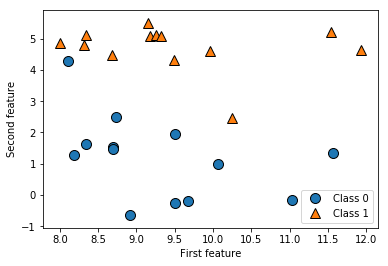

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

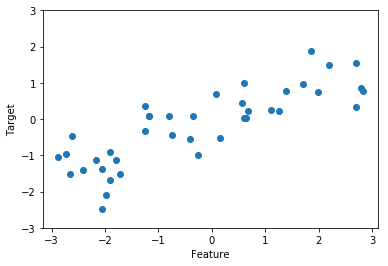

In [2]:
%matplotlib inline

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys(): \n{cancer.keys()}")

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


In [5]:
print("Sample counts per class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [6]:
print(f"Feature names: \n{cancer.feature_names}")

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"Data shape: {boston.data.shape}")

Data shape: (506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape: {X.shape}")

X.shape: (506, 104)


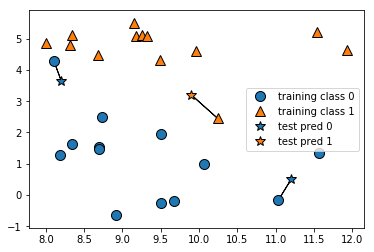

In [9]:
%matplotlib inline

mglearn.plots.plot_knn_classification(n_neighbors=1)

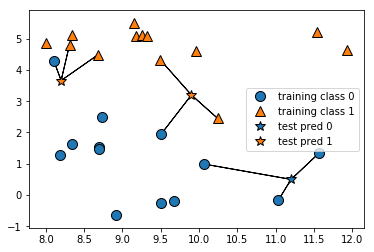

In [10]:
%matplotlib inline

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


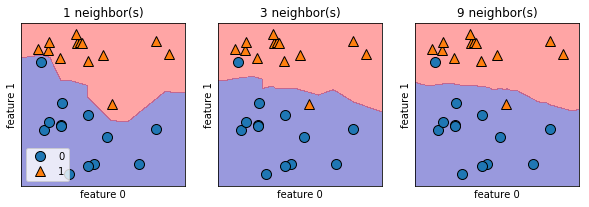

In [12]:
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

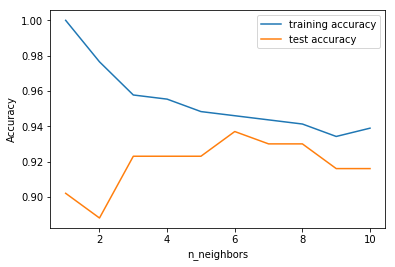

In [13]:
%matplotlib inline

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

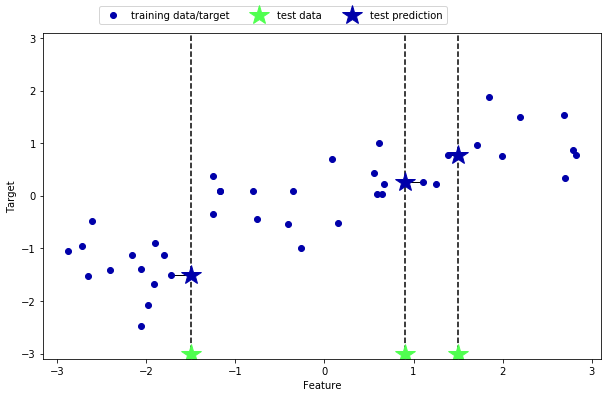

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

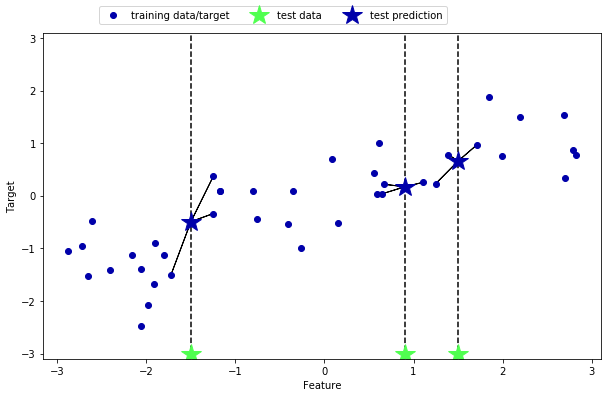

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(x_test)))
print("Test set R^2: {:.2f}".format(reg.score(x_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


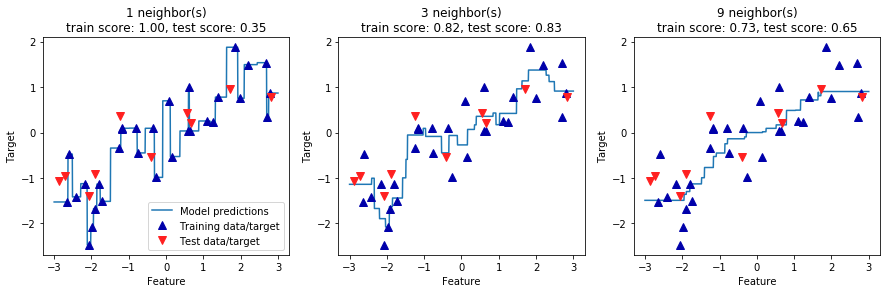

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\ntrain score: {:.2f}, test score: {:.2f}".format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

# 2.3.3 線形モデル
## 2.3.3.1 線形モデルによる回帰

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


w[0]: 0.393906  b: -0.031804


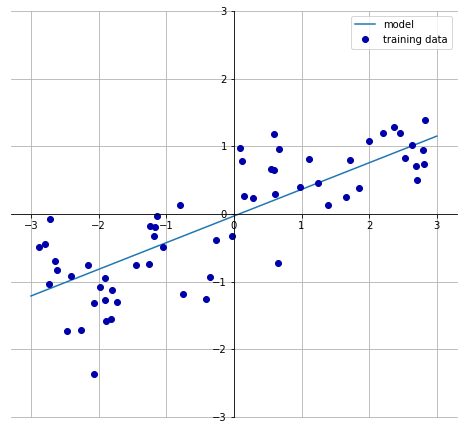

In [18]:
mglearn.plots.plot_linear_regression_wave()

## 2.3.3.2 線形回帰(通常最小二乗法)

In [19]:
from sklearn.linear_model import LinearRegression
x, y = mglearn.datasets.make_wave(n_samples=60)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression().fit(x_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [20]:
x, y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

lr = LinearRegression().fit(x_train, y_train)

print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

Training set score: 0.95
Test set score: 0.61


## 2.3.3.3 リッジ回帰


In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [22]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(x_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [23]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test, y_test)))

Training set score: 0.93
Test set score: 0.77


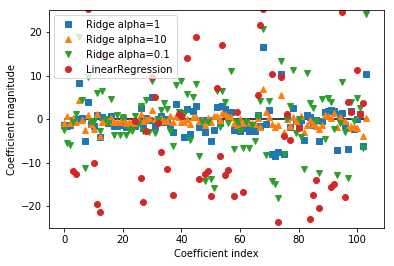

In [24]:
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

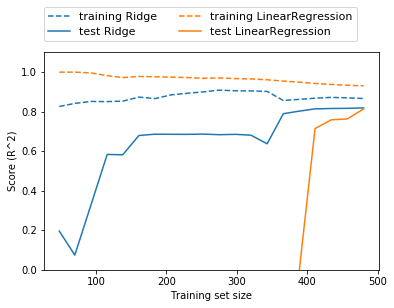

In [25]:
mglearn.plots.plot_ridge_n_samples()

## 2.3.3.4 Lasso

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [27]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [28]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


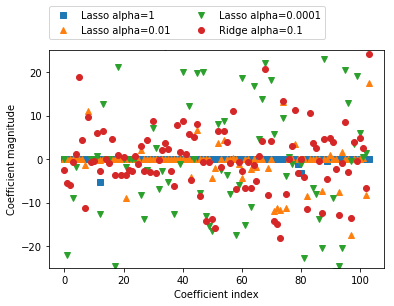

In [29]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

## 2.3.3.5 クラス分類のための線形モデル


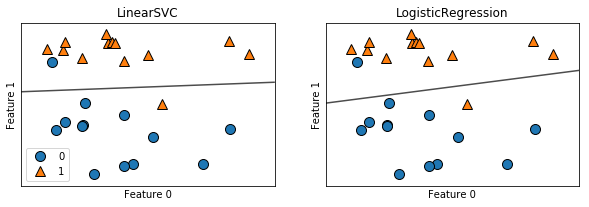

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()

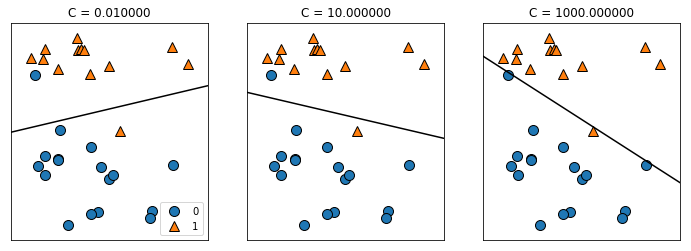

In [31]:
mglearn.plots.plot_linear_svc_regularization()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [33]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [34]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))

Training set score: 0.934
Test set score: 0.930


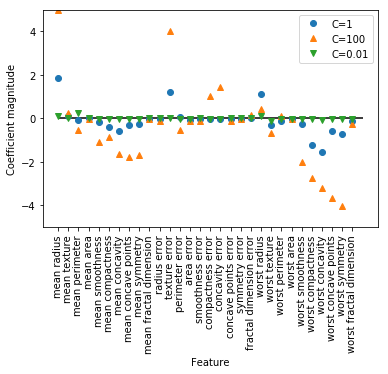

In [35]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


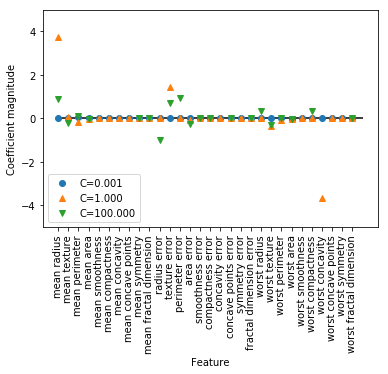

In [36]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(x_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(x_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)

## 2.3.3.6 線形モデルによる他クラス分類

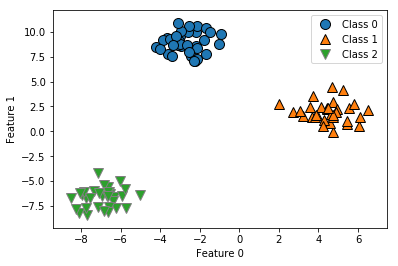

In [37]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [38]:
linear_svm = LinearSVC().fit(x, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


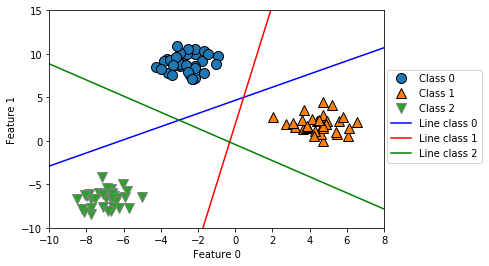

In [39]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

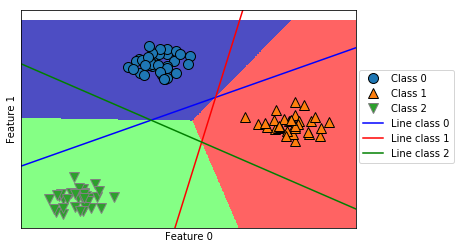

In [40]:
mglearn.plots.plot_2d_classification(linear_svm, x, fill=True, alpha=.7)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

## 2.3.3.7 利点、欠点、パラメータ

### 2.3.4 ナイーブベイズクラス分類器

In [41]:
x = np.array([[0,1,0,1], [1,0,1,1], [0,0,0,1], [1,0,1,0]])
y = np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    counts[label] = x[y == label].sum(axis=0)
    
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 2.3.5 決定木

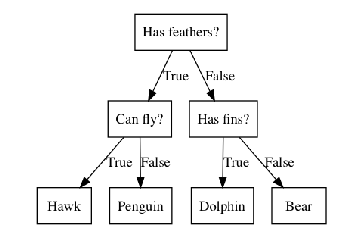

In [48]:
mglearn.plots.plot_animal_tree()

In [49]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [50]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 2.3.5.3 決定木の解析

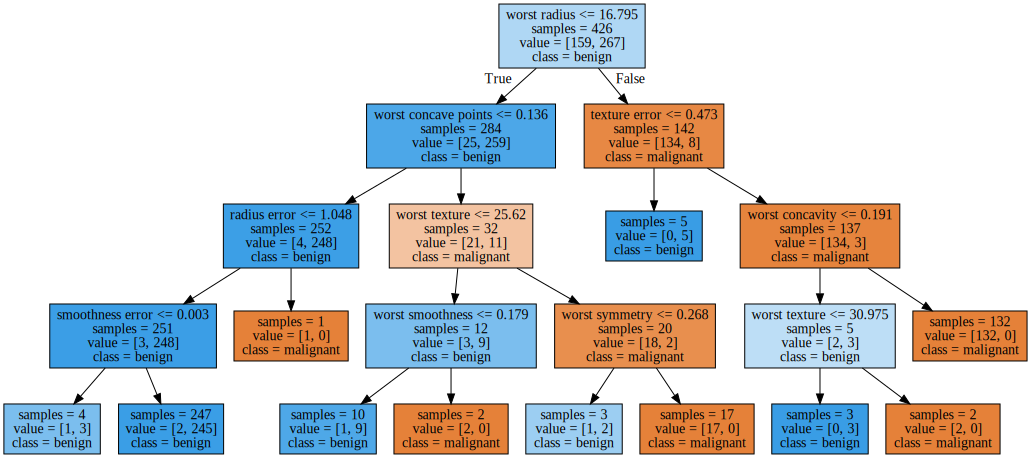

In [52]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [53]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


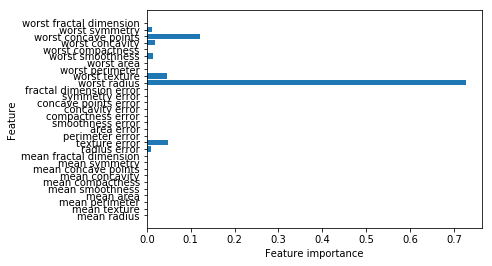

In [54]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


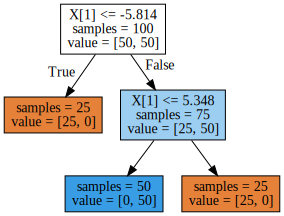

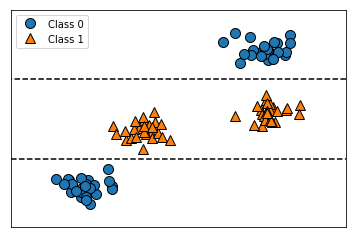

In [55]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'Price in $/Mbyte')

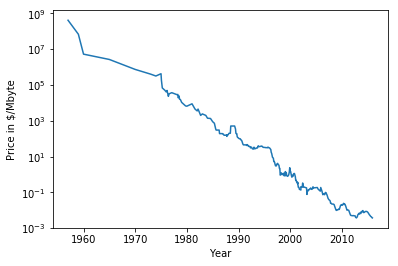

In [57]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

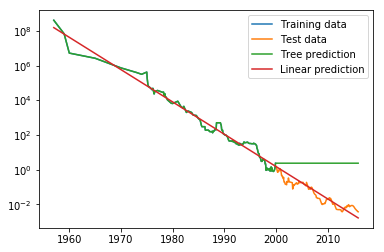

In [59]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

x_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

x_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")

plt.legend()

#### 2.3.5.5 長所、短所、パラメータ

### 2.3.6 決定木のアンサンブル法
#### 2.3.6.1 ランダムフォレスト

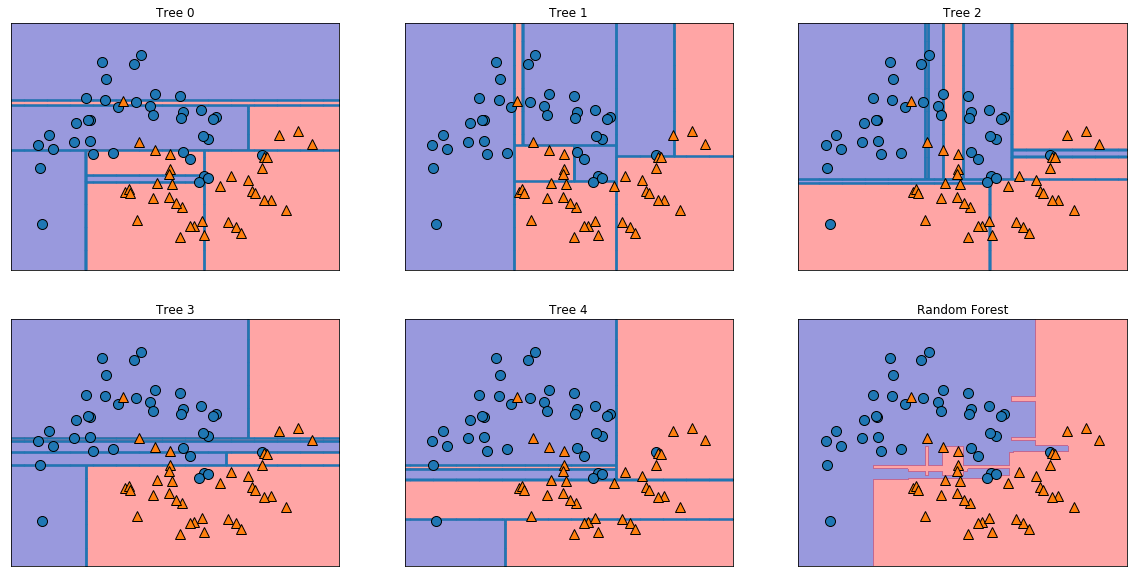

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


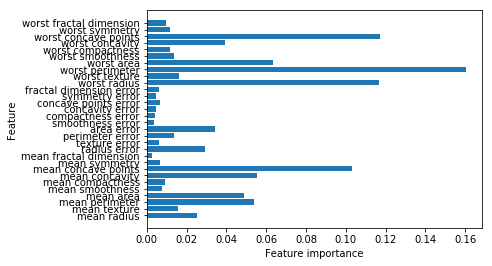

In [62]:
plot_feature_importances_cancer(forest)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [64]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [65]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


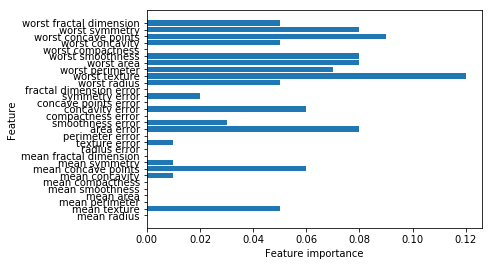

In [66]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

plot_feature_importances_cancer(gbrt)

### 2.3.7 カーネル法を用いたサポートベクタマシン
#### 2.3.7.1 線形モデルと非線形特徴量

Text(0,0.5,'Feature 1')

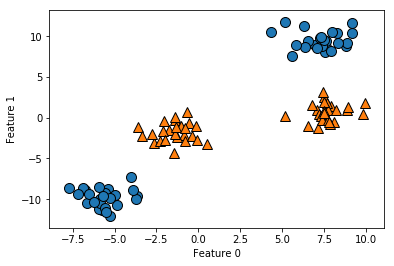

In [67]:
x, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

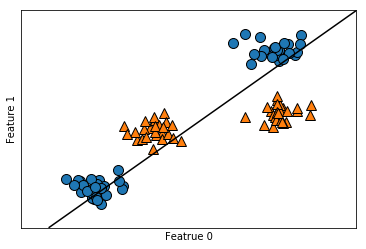

In [69]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(x, y)

mglearn.plots.plot_2d_separator(linear_svm, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("Featrue 0")
plt.ylabel("Feature 1")

Text(0.5,0,'feature1 ** 2')

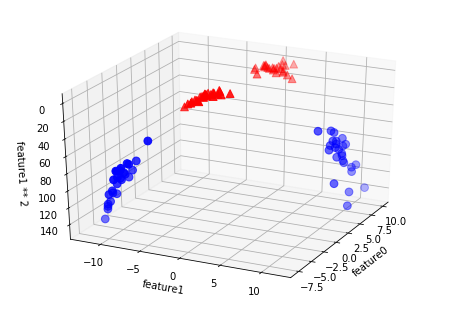

In [70]:
x_new = np.hstack([x, x[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5,0,'feature1 ** 2')

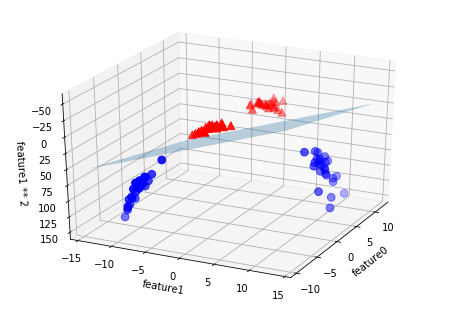

In [72]:
linear_svm_3d = LinearSVC().fit(x_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(x_new[:, 0].min() - 2, x_new[:, 0].max() + 2, 50)
yy = np.linspace(x_new[:, 1].min() - 2, x_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

#### 2.3.7.3 SVMを理解する

Text(0,0.5,'Feature 1')

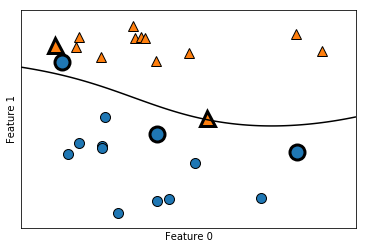

In [73]:
from sklearn.svm import SVC

x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(x, y)
mglearn.plots.plot_2d_separator(svm, x, eps=.5)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 2.3.7.4 SVMパラメータの調整

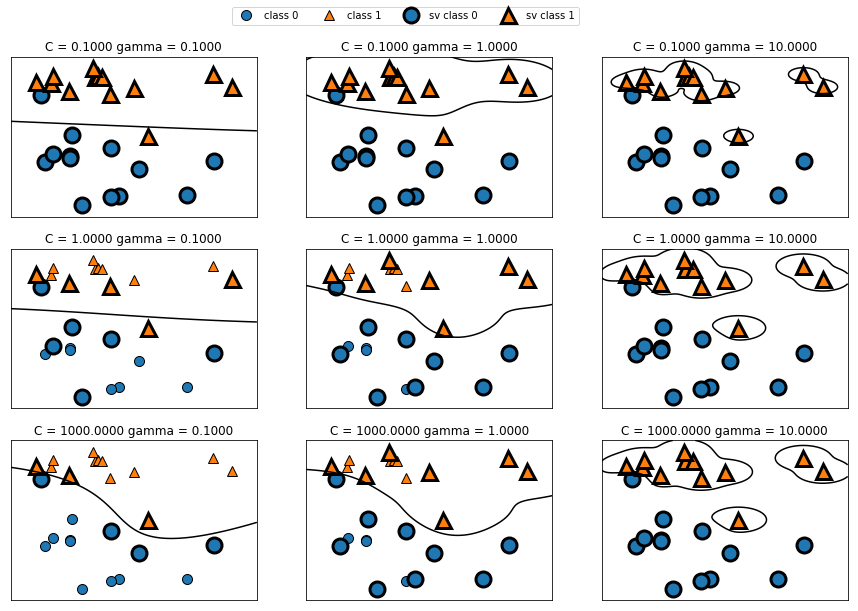

In [74]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip (ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [76]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(x_train, y_train)

print("Accuracy on training set :{:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set :{:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set :1.00
Accuracy on test set :0.63


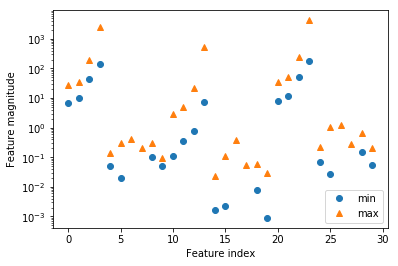

In [77]:
plt.plot(x_train.min(axis=0), "o", label="min")
plt.plot(x_train.max(axis=0), "^", label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

#### 2.3.7.5 SVMのためのデータの前処理

In [78]:
min_on_training = x_train.min(axis=0)
range_on_training = (x_train - min_on_training).max(axis=0)

x_train_scaled = (x_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(x_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(x_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [79]:
x_test_scaled = (x_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(x_train_scaled, y_train)

print("Accuracy on training set :{:.3f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on test set :{:.3f}".format(svc.score(x_test_scaled, y_test)))

Accuracy on training set :0.948
Accuracy on test set :0.951


In [80]:
svc = SVC(C=1000)
svc.fit(x_train_scaled, y_train)

print("Accuracy on training set :{:.3f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on test set :{:.3f}".format(svc.score(x_test_scaled, y_test)))

Accuracy on training set :0.988
Accuracy on test set :0.972


### 2.3.8 ニューラルネットワーク (ディープラーニング)
#### 2.3.8.1 ニューラルネットワークモデル

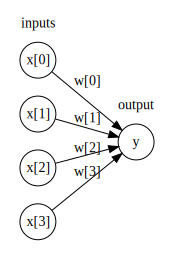

In [81]:
display(mglearn.plots.plot_logistic_regression_graph())

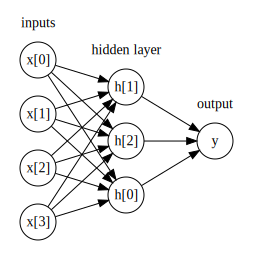

In [83]:
display(mglearn.plots.plot_single_hidden_layer_graph())

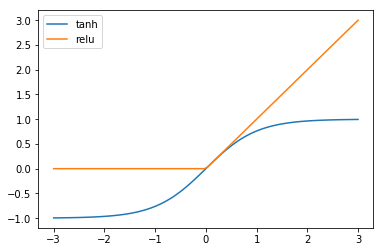

In [84]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")

Text(0,0.5,'Feature 1')

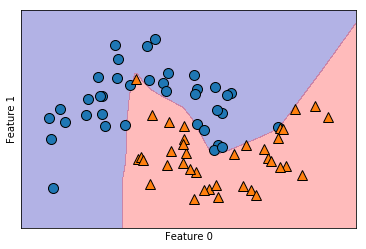

In [85]:
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

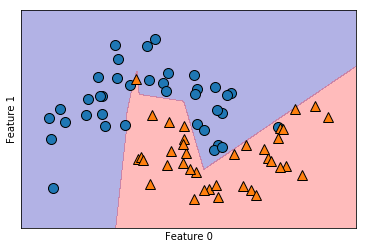

In [86]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10]).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

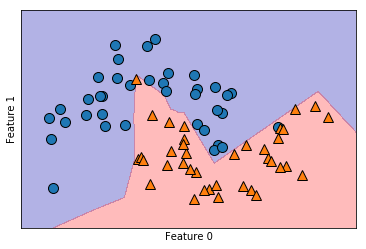

In [87]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10]).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

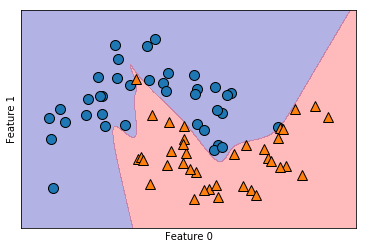

In [88]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, activation="tanh", hidden_layer_sizes=[10, 10]).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

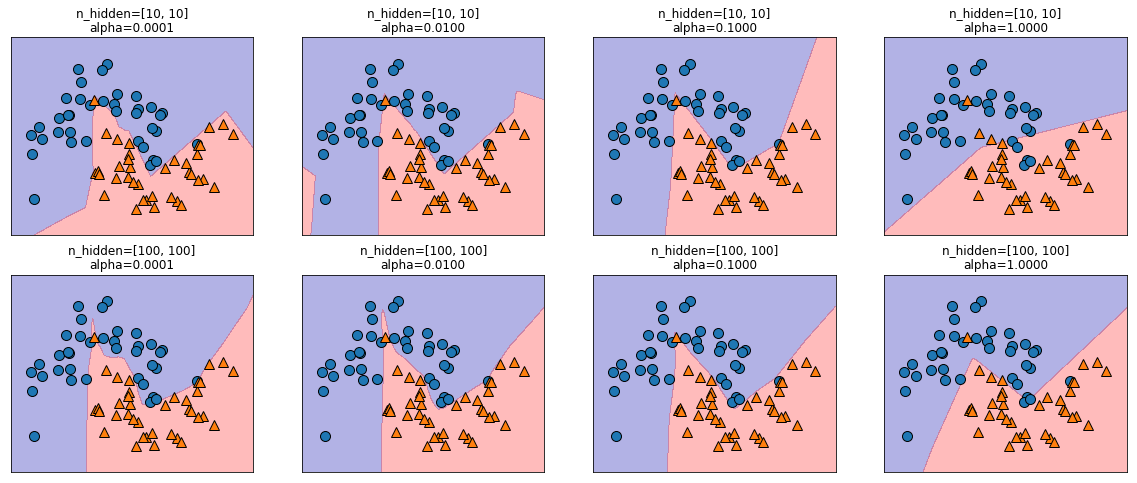

In [89]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(x_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [90]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [93]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

print("Accuracy on training set :{:.3f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set :{:.3f}".format(mlp.score(x_test, y_test)))

Accuracy on training set :0.906
Accuracy on test set :0.881


In [94]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)

x_train_scaled = (x_train - mean_on_train) / std_on_train
x_test_scaled = (x_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set :{:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set :{:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set :0.991
Accuracy on test set :0.965


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [97]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=0.0001)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set :{:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set :{:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set :0.993
Accuracy on test set :0.972


In [96]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set :{:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set :{:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set :0.988
Accuracy on test set :0.972


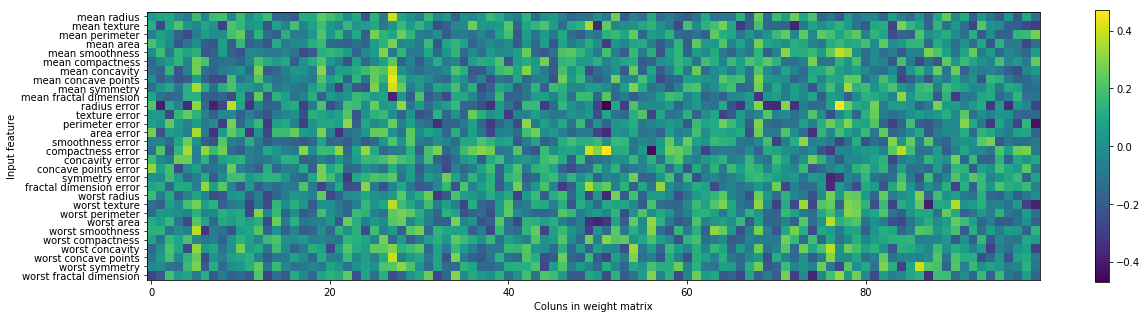

In [98]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Coluns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## 2.4 クラス分類器の不確実性推定

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

x, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

x_train, x_test, y_train_named, y_test_named, y_train, y_test = train_test_split(x, y_named, y, random_state=0)

grbt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

### 2.4.1 決定関数 (Decision Function)

In [106]:
print("x_test.shape: {}".format(x_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(x_test).shape))

x_test.shape: (25, 2)
Decision function shape: (25,)


In [107]:
print("Decision function:\n{}".format(gbrt.decision_function(x_test)[:6]))

Decision function:
[ 1.55586344 -0.53458522 -0.98032576 -1.38605264  1.74050566  1.30384671]


In [108]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(x_test) > 0))
print("Predictions: \n{}".format(gbrt.predict(x_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False  True False  True  True  True  True  True False
 False]
Predictions: 
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'red' 'red' 'red'
 'blue' 'blue']


In [109]:
greater_zero = (gbrt.decision_function(x_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(x_test))))

pred is equal to predictions: True


In [114]:
decision_function = gbrt.decision_function(x_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -4.87 maximum: 1.74


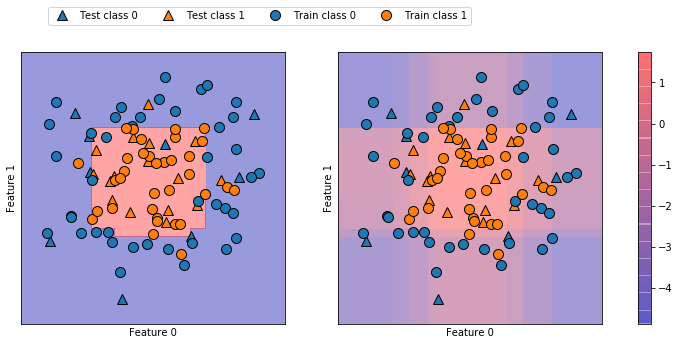

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, markers="o", ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

### 2.4.2 確率の予測

In [118]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(x_test).shape))

Shape of probabilities: (25, 2)


In [120]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(x_test[:6])))

Predicted probabilities:
[[ 0.17424102  0.82575898]
 [ 0.63055191  0.36944809]
 [ 0.72717285  0.27282715]
 [ 0.79996132  0.20003868]
 [ 0.14924872  0.85075128]
 [ 0.21351833  0.78648167]]


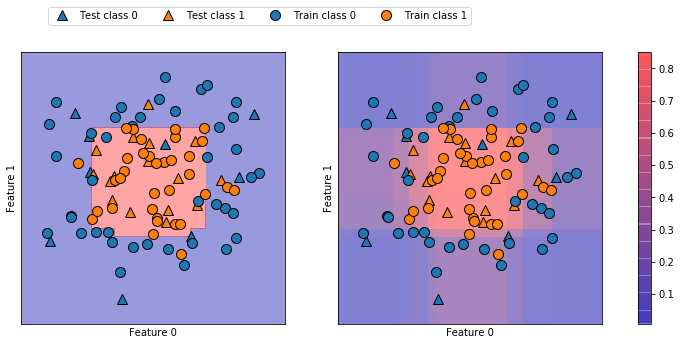

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, markers="o", ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

In [123]:
from sklearn.datasets import load_iris

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(x_train, y_train)

print("Decision function shape: {}".format(gbrt.decision_function(x_test).shape))
print("Decision funcion :\n{}".format(gbrt.decision_function(x_test)[:6, :]))

Decision function shape: (38, 3)
Decision funcion :
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [124]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(x_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(x_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [125]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(x_test)[:6]))
print("Sums: {}".format(gbrt.predict_proba(x_test)[:6].sum(axis=1)))

Predicted probabilities:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
Sums: [ 1.  1.  1.  1.  1.  1.]


In [126]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(x_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(x_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [127]:
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(x_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(x_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(x_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
